In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
diag_delay_sheet = pd.read_excel('../Data/TEIS-NSS Project Data 10-2022.xlsx', 
                                 sheet_name='Elig Timeline Rpt 2018-2022')


In [4]:
diag_delay_sheet.head()

,District,Child ID,Child Status,Child Phase,Init. IFSP Due Date,IFSP Due Date,IFSP Late Reason,Active Ref. Date,Parent Consent/Intake Date,Date Dev. Evaluator Rec'd. Ref.,...,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.,Init. Elig. Decision,Init. Elig. Category,Init. Elig. Det. Date,Exit Date,Exit Reason
0,ET,453926,Inactive,IFSP,2019-03-04,2019-03-27,System,2019-01-18,2019-02-04,2019-01-22 00:00:00,...,17.0,30.0,NaN,4.0,38.0,Eligible,Developmental Evaluation,2019-02-25,2020-01-11,618 - Part B eligible
1,ET,431729,Inactive,IFSP,2018-10-26,2018-10-26,NaN,2018-09-11,2018-09-25,2018-09-12 00:00:00,...,0.0,13.0,NaN,6.0,20.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2018-10-01,2020-12-11,618 - Part B eligibility not determined
2,ET,462474,Inactive,IFSP,2019-06-28,2019-06-14,NaN,2019-05-14,2019-05-30,2019-05-15 00:00:00,...,0.0,15.0,0.0,1.0,17.0,Eligible,Developmental Evaluation,2019-05-31,2020-11-12,618 - Part B eligibility not determined
3,ET,446841,Inactive,Eligibility,2018-11-23,NaT,NaN,2018-10-09,2018-10-25,2018-10-11 00:00:00,...,0.0,14.0,NaN,1.0,17.0,Eligible,Diagnosed Condition,2018-10-26,2020-08-12,Parent decline
4,ET,459629,Inactive,IFSP,2019-05-16,2019-04-24,NaN,2019-04-01,2019-04-10,2019-04-02 00:00:00,...,0.0,8.0,0.0,2.0,11.0,Eligible,Developmental Evaluation,2019-04-12,2019-09-26,618 - Parent withdraw


In [5]:
ent_data_sheet = pd.read_excel('../Data/TEIS-NSS Project Data 10-2022.xlsx', sheet_name='ECO with Exit21-22')


In [42]:
ent_data_sheet  = ent_data_sheet[(ent_data_sheet ['OC1 Data Check'] == 1)]

In [43]:
ent_data_sheet.rename(columns = {'CHILD_ID':'Child ID'}, inplace = True)
ent_data_sheet

,DISTRICT,Child ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Days btw I-IFSP to entry ECO
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,206.0,183.0,0.0
1,ET,479453.0,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,704.0,514.0,0.0
3,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1053.0,1026.0,0.0
5,ET,494216.0,2021-01-06,2.0,4.0,6.0,2021-06-30,4.0,5.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,288.0,175.0,0.0
6,ET,449725.0,2020-08-06,4.0,5.0,7.0,2021-04-21,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,444.0,348.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8624,UC,490337.0,2020-11-09,3.0,1.0,1.0,2021-05-12,3.0,3.0,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,445.0,184.0,0.0
8626,UC,483729.0,2020-08-25,1.0,3.0,2.0,2021-08-12,6.0,6.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,416.0,352.0,0.0
8627,UC,485978.0,2020-08-19,1.0,3.0,5.0,2021-02-11,5.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,361.0,176.0,0.0
8628,UC,488802.0,2020-09-21,4.0,4.0,3.0,2021-09-09,6.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,353.0,353.0,0.0


In [10]:
combined_table = pd.merge(ent_data_sheet, diag_delay_sheet, on = ['Child ID'], how = 'inner')
combined_table

,DISTRICT,Child ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.,Init. Elig. Decision,Init. Elig. Category,Init. Elig. Det. Date,Exit Date_y,Exit Reason_y
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,...,7.0,7.0,NaN,9.0,20.0,Eligible,Developmental Evaluation,2021-04-14,2021-11-15,618 - Part B eligible
1,ET,479453.0,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,...,-1.0,7.0,0.0,8.0,15.0,Eligible,Developmental Evaluation,2020-03-20,2022-02-25,618 - Completion of IFSP/ no longer requires s...
2,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,...,0.0,NaN,NaN,1.0,14.0,Eligible,Developmental Evaluation,2019-01-16,2021-12-19,618 - Part B eligible
3,ET,494216.0,2021-01-06,2.0,4.0,6.0,2021-06-30,4.0,5.0,7.0,...,1.0,8.0,0.0,0.0,9.0,Eligible,Developmental Evaluation,2020-12-17,2021-10-21,618 - Parent withdraw
4,ET,449725.0,2020-08-06,4.0,5.0,7.0,2021-04-21,7.0,7.0,7.0,...,38.0,51.0,NaN,2.0,55.0,Eligible,Developmental Evaluation,2020-05-06,2021-07-26,618 - Parent withdraw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5590,UC,490337.0,2020-11-09,3.0,1.0,1.0,2021-05-12,3.0,3.0,1.0,...,0.0,16.0,0.0,4.0,20.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2020-10-19,2022-01-28,618 - Parent withdraw
5591,UC,483729.0,2020-08-25,1.0,3.0,2.0,2021-08-12,6.0,6.0,6.0,...,1.0,1.0,0.0,3.0,7.0,Eligible,Developmental Evaluation,2020-08-21,2021-10-15,618 - Part B eligible
5592,UC,485978.0,2020-08-19,1.0,3.0,5.0,2021-02-11,5.0,7.0,7.0,...,0.0,8.0,0.0,2.0,11.0,Eligible,Developmental Evaluation,2020-07-24,2021-08-15,618 - Part B eligibility not determined
5593,UC,488802.0,2020-09-21,4.0,4.0,3.0,2021-09-09,6.0,7.0,7.0,...,0.0,6.0,4.0,6.0,13.0,Eligible,Developmental Evaluation,2020-09-15,2021-09-09,618 - Parent withdraw


In [11]:
combined_table_delay = combined_table[(combined_table['Init. Elig. Category'] == 
                                            'Developmental Evaluation')]

In [12]:
combined_table_delay

,DISTRICT,Child ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.,Init. Elig. Decision,Init. Elig. Category,Init. Elig. Det. Date,Exit Date_y,Exit Reason_y
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,...,7.0,7.0,NaN,9.0,20.0,Eligible,Developmental Evaluation,2021-04-14,2021-11-15,618 - Part B eligible
1,ET,479453.0,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,...,-1.0,7.0,0.0,8.0,15.0,Eligible,Developmental Evaluation,2020-03-20,2022-02-25,618 - Completion of IFSP/ no longer requires s...
2,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,...,0.0,NaN,NaN,1.0,14.0,Eligible,Developmental Evaluation,2019-01-16,2021-12-19,618 - Part B eligible
3,ET,494216.0,2021-01-06,2.0,4.0,6.0,2021-06-30,4.0,5.0,7.0,...,1.0,8.0,0.0,0.0,9.0,Eligible,Developmental Evaluation,2020-12-17,2021-10-21,618 - Parent withdraw
4,ET,449725.0,2020-08-06,4.0,5.0,7.0,2021-04-21,7.0,7.0,7.0,...,38.0,51.0,NaN,2.0,55.0,Eligible,Developmental Evaluation,2020-05-06,2021-07-26,618 - Parent withdraw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5589,UC,456154.0,2019-03-14,4.0,5.0,2.0,2021-03-03,7.0,6.0,7.0,...,0.0,2.0,3.0,4.0,10.0,Eligible,Developmental Evaluation,2019-02-25,2021-09-11,618 - Part B eligible
5591,UC,483729.0,2020-08-25,1.0,3.0,2.0,2021-08-12,6.0,6.0,6.0,...,1.0,1.0,0.0,3.0,7.0,Eligible,Developmental Evaluation,2020-08-21,2021-10-15,618 - Part B eligible
5592,UC,485978.0,2020-08-19,1.0,3.0,5.0,2021-02-11,5.0,7.0,7.0,...,0.0,8.0,0.0,2.0,11.0,Eligible,Developmental Evaluation,2020-07-24,2021-08-15,618 - Part B eligibility not determined
5593,UC,488802.0,2020-09-21,4.0,4.0,3.0,2021-09-09,6.0,7.0,7.0,...,0.0,6.0,4.0,6.0,13.0,Eligible,Developmental Evaluation,2020-09-15,2021-09-09,618 - Parent withdraw


In [13]:
combined_table_diagnosed = combined_table[(combined_table['Init. Elig. Category'] == 
                                            'Diagnosed Condition')]

In [14]:
combined_table_diagnosed

,DISTRICT,Child ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.,Init. Elig. Decision,Init. Elig. Category,Init. Elig. Det. Date,Exit Date_y,Exit Reason_y
36,ET,470629.0,2019-11-04,2.0,5.0,4.0,2021-10-20,7.0,6.0,7.0,...,0.0,8.0,0.0,7.0,15.0,Eligible,Diagnosed Condition,2019-10-15,2022-04-11,618 - Attempts to contact unsuccessful
39,ET,472165.0,2019-12-06,2.0,1.0,3.0,2022-04-29,7.0,7.0,7.0,...,0.0,11.0,6.0,14.0,25.0,Eligible,Diagnosed Condition,2019-11-19,2022-04-29,618 - Parent withdraw
49,ET,459388.0,2019-04-26,1.0,4.0,1.0,2021-09-23,1.0,1.0,1.0,...,0.0,11.0,0.0,4.0,15.0,Eligible,Diagnosed Condition,2019-04-12,2022-01-19,618 - Completion of IFSP/ no longer requires s...
61,ET,452507.0,2019-05-13,2.0,5.0,1.0,2021-05-03,7.0,7.0,7.0,...,-117.0,5.0,NaN,1.0,-116.0,Eligible,Diagnosed Condition,2019-01-10,2021-08-05,618 - Parent withdraw
69,ET,466802.0,2019-08-28,2.0,5.0,2.0,2022-01-24,7.0,7.0,7.0,...,0.0,2.0,3.0,4.0,7.0,Eligible,Diagnosed Condition,2019-08-05,2022-04-21,618 - Part B eligibility not determined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5483,UC,494352.0,2021-01-29,3.0,5.0,3.0,2021-07-23,3.0,6.0,5.0,...,1.0,5.0,21.0,23.0,28.0,Eligible,Diagnosed Condition,2021-01-07,2021-10-22,618 - Parent withdraw
5500,UC,457591.0,2019-03-28,3.0,3.0,2.0,2021-08-04,6.0,3.0,4.0,...,0.0,6.0,4.0,8.0,15.0,Eligible,Diagnosed Condition,2019-03-21,2021-11-09,618 - Part B eligibility not determined
5523,UC,462527.0,2019-10-03,1.0,5.0,1.0,2021-10-01,1.0,1.0,1.0,...,-115.0,6.0,1.0,8.0,-107.0,Eligible,Diagnosed Condition,2019-05-28,2022-03-23,618 - Part B eligible
5542,UC,448959.0,2018-11-30,4.0,3.0,4.0,2021-03-19,7.0,6.0,7.0,...,0.0,12.0,6.0,8.0,21.0,Eligible,Diagnosed Condition,2018-11-27,2021-08-30,618 - Part B eligibility not determined


In [15]:
combined_table_both = combined_table[(combined_table['Init. Elig. Category'] == 
                                            'Diagnosed Condition, Developmental Evaluation')]  


In [16]:
combined_table_both

,DISTRICT,Child ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.,Init. Elig. Decision,Init. Elig. Category,Init. Elig. Det. Date,Exit Date_y,Exit Reason_y
7,ET,489949.0,2020-10-20,2.0,1.0,2.0,2021-09-30,1.0,4.0,5.0,...,5.0,7.0,6.0,1.0,9.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2020-10-01,2022-04-06,618 - Parent withdraw
9,ET,473208.0,2021-01-31,3.0,4.0,6.0,2021-12-15,5.0,1.0,4.0,...,8.0,22.0,0.0,1.0,26.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2020-12-16,2022-05-07,618 - Part B eligibility not determined
22,ET,469115.0,2019-10-14,2.0,4.0,7.0,2021-09-01,7.0,7.0,7.0,...,0.0,9.0,18.0,21.0,30.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2019-10-04,2021-12-11,618 - Part B eligible
27,ET,491969.0,2020-12-04,7.0,7.0,7.0,2021-06-02,7.0,7.0,7.0,...,5.0,5.0,3.0,1.0,7.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2020-11-03,2021-07-04,618 - Part B eligible
34,ET,449508.0,2018-12-18,1.0,3.0,1.0,2021-05-05,2.0,2.0,1.0,...,0.0,NaN,NaN,7.0,21.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2018-12-06,2021-10-07,618 - Part B eligible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,UC,471741.0,2019-11-07,3.0,3.0,4.0,2022-03-30,7.0,7.0,7.0,...,0.0,6.0,0.0,6.0,13.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2019-10-30,2022-04-16,618 - Parent withdraw
5568,UC,453156.0,2019-02-11,4.0,4.0,4.0,2021-12-08,6.0,6.0,7.0,...,0.0,6.0,10.0,12.0,18.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2019-01-28,2021-12-23,618 - Not eligible for Part B – Exit with no r...
5576,UC,472442.0,2019-12-04,2.0,1.0,1.0,2021-07-28,6.0,6.0,7.0,...,0.0,8.0,0.0,6.0,15.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2019-11-14,2021-09-16,618 - Parent withdraw
5581,UC,492126.0,2020-11-20,2.0,3.0,2.0,2021-05-26,3.0,3.0,1.0,...,0.0,4.0,1.0,8.0,12.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2020-11-10,2022-04-27,618 - Moved out of state


In [17]:
Lost_Child  = combined_table[combined_table['Init. Elig. Category'].isna()]

In [18]:
Lost_Child

,DISTRICT,Child ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.,Init. Elig. Decision,Init. Elig. Category,Init. Elig. Det. Date,Exit Date_y,Exit Reason_y
4358,SC,468726.0,2021-04-21,7.0,7.0,7.0,2021-08-21,7.0,7.0,7.0,...,0.0,545.0,NaN,24.0,31.0,Ineligible,NaN,2021-03-19,2021-11-22,618 - Part B eligible


In [19]:
delay_OC1A = combined_table_delay[(combined_table_delay['OC1 - a'] == 
                                            1)]  
delay_OC1B = combined_table_delay[(combined_table_delay['OC1 - b'] == 
                                            1)]  
delay_OC1C = combined_table_delay[(combined_table_delay['OC1 - c'] == 
                                            1)]  
delay_OC1D = combined_table_delay[(combined_table_delay['OC1 - d'] == 
                                            1)]  
delay_OC1E = combined_table_delay[(combined_table_delay['OC1 - e'] == 
                                            1)]  

In [20]:
diagnosed_OC1A = combined_table_diagnosed[(combined_table_diagnosed['OC1 - a'] == 
                                            1)]  
diagnosed_OC1B = combined_table_diagnosed[(combined_table_diagnosed['OC1 - b'] == 
                                            1)]  
diagnosed_OC1C = combined_table_diagnosed[(combined_table_diagnosed['OC1 - c'] == 
                                            1)]  
diagnosed_OC1D = combined_table_diagnosed[(combined_table_diagnosed['OC1 - d'] == 
                                            1)]  
diagnosed_OC1E = combined_table_diagnosed[(combined_table_diagnosed['OC1 - e'] == 
                                            1)]  

In [21]:
both_OC1A = combined_table_both[(combined_table_both['OC1 - a'] == 
                                            1)]  
both_OC1B = combined_table_both[(combined_table_both['OC1 - b'] == 
                                            1)] 
both_OC1C = combined_table_both[(combined_table_both['OC1 - c'] == 
                                            1)] 
both_OC1D = combined_table_both[(combined_table_both['OC1 - d'] == 
                                            1)] 
both_OC1E = combined_table_both[(combined_table_both['OC1 - e'] == 
                                            1)] 

In [22]:
diagnosed_OC1A_amount = len(diagnosed_OC1A.axes[0])
delay_OC1A_amount = len(delay_OC1A.axes[0])
both_OC1A_amount = len(both_OC1A.axes[0])


In [23]:
diagnosed_OC1B_amount = len(diagnosed_OC1B.axes[0])
delay_OC1B_amount = len(delay_OC1B.axes[0])
both_OC1B_amount = len(both_OC1B.axes[0])


In [24]:
diagnosed_OC1C_amount = len(diagnosed_OC1C.axes[0])
delay_OC1C_amount = len(delay_OC1C.axes[0])
both_OC1C_amount = len(both_OC1C.axes[0])

In [25]:
diagnosed_OC1D_amount = len(diagnosed_OC1D.axes[0])
delay_OC1D_amount = len(delay_OC1D.axes[0])
both_OC1D_amount = len(both_OC1D.axes[0])

In [26]:
diagnosed_OC1E_amount = len(diagnosed_OC1E.axes[0])
delay_OC1E_amount = len(delay_OC1E.axes[0])
both_OC1E_amount = len(both_OC1E.axes[0])

In [27]:
 OC1_a_Totals = np.array([diagnosed_OC1A_amount,delay_OC1A_amount,both_OC1A_amount])

mylabels = ['Diagnosed','Delay','Both']

Text(0.5, 1.0, 'OC1-a')

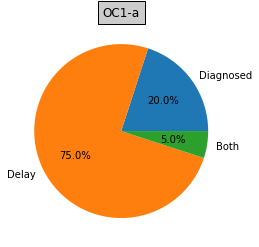

In [41]:
plt.pie( OC1_a_Totals , labels = mylabels, autopct='%1.1f%%')
plt.title('OC1-a', bbox={'facecolor':'0.8', 'pad':5})

<AxesSubplot:title={'center':'Totals of Outcome1 by Eligibilty Category'}, xlabel='Outcomes'>

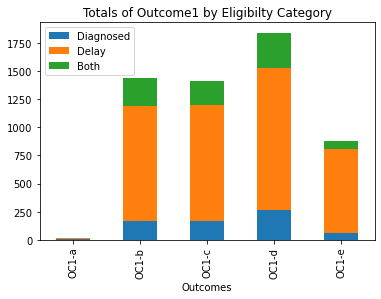

In [30]:
outcomes1_stacked = pd.DataFrame([['OC1-a', diagnosed_OC1A_amount, delay_OC1A_amount, both_OC1A_amount], ['OC1-b',diagnosed_OC1B_amount, delay_OC1B_amount, both_OC1B_amount], 
                   ['OC1-c',diagnosed_OC1C_amount, delay_OC1C_amount, both_OC1C_amount],['OC1-d',diagnosed_OC1D_amount, delay_OC1D_amount, both_OC1D_amount],
                   ['OC1-e',diagnosed_OC1E_amount, delay_OC1E_amount, both_OC1E_amount]],
                  columns=['Outcomes', 'Diagnosed', 'Delay', 'Both'])

outcomes1_stacked.plot(x='Outcomes', kind='bar', stacked=True,
        title='Totals of Outcome1 by Eligibilty Category')

In [35]:
combined_table['Exit Reason_y'].unique()

array(['618 - Part B eligible',
       '618 - Completion of IFSP/ no longer requires services',
       '618 - Parent withdraw', '618 - Part B eligibility not determined',
       '618 - Not eligible for Part B – Exit with no referrals',
       '618 - Moved out of state',
       '618 - Not eligible for Part B – Exit with referral to other programs',
       '618 - Attempts to contact unsuccessful', '618 - Deceased', nan],
      dtype=object)

In [36]:
combined_table['Exit Reason_y'].value_counts()

618 - Part B eligible                                                   1741
618 - Part B eligibility not determined                                 1577
618 - Parent withdraw                                                   1134
618 - Not eligible for Part B – Exit with referral to other programs     308
618 - Attempts to contact unsuccessful                                   299
618 - Not eligible for Part B – Exit with no referrals                   298
618 - Moved out of state                                                 148
618 - Completion of IFSP/ no longer requires services                     57
618 - Deceased                                                            10
Name: Exit Reason_y, dtype: int64

In [40]:
combined_table['Exit Reason_y'].isna().sum() 

23

In [95]:
combined_table_delay['Exit Reason_y'].value_counts()

618 - Part B eligible                                                   1318
618 - Part B eligibility not determined                                 1182
618 - Parent withdraw                                                    780
618 - Not eligible for Part B – Exit with no referrals                   231
618 - Not eligible for Part B – Exit with referral to other programs     227
618 - Attempts to contact unsuccessful                                   185
618 - Moved out of state                                                  93
618 - Completion of IFSP/ no longer requires services                     38
618 - Deceased                                                             4
Name: Exit Reason_y, dtype: int64

In [47]:
 combined_table_diagnosed['Exit Reason_y'].value_counts()

In [45]:
combined_table_both['Exit Reason_y'].value_counts()

<AxesSubplot:>

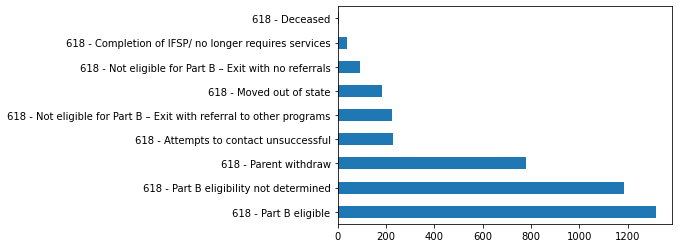

In [56]:
combined_table_delay['Exit Reason_y'].value_counts().plot(kind='barh')

<AxesSubplot:>

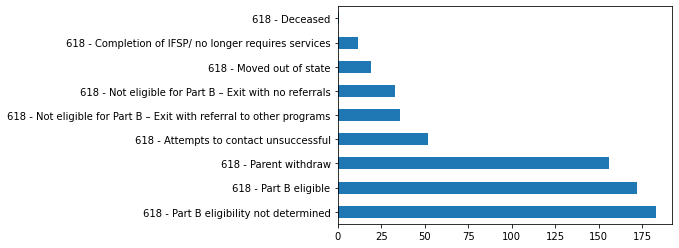

In [57]:
combined_table_diagnosed['Exit Reason_y'].value_counts().plot(kind='barh')

<AxesSubplot:>

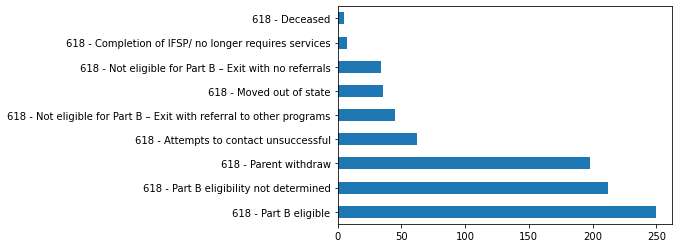

In [58]:
combined_table_both['Exit Reason_y'].value_counts().plot(kind='barh')

In [63]:
exit_reason_list = combined_table_delay['Exit Reason_y'].value_counts().index.tolist()
exit_reason_list


['618 - Part B eligible',
 '618 - Part B eligibility not determined',
 '618 - Parent withdraw',
 '618 - Not eligible for Part B – Exit with no referrals',
 '618 - Not eligible for Part B – Exit with referral to other programs',
 '618 - Attempts to contact unsuccessful',
 '618 - Moved out of state',
 '618 - Completion of IFSP/ no longer requires services',
 '618 - Deceased']

In [78]:
Part_b_both = combined_table_both[(combined_table_both['Exit Reason_y'] == 
                                            '618 - Part B eligible')]  
Part_b_elig_both = combined_table_both[(combined_table_both['Exit Reason_y'] == 
                                            '618 - Part B eligibility not determined')]  
Part_parent_both = combined_table_both[(combined_table_both['Exit Reason_y'] == 
                                            '618 - Parent withdraw')]  
Part_not_both = combined_table_both[(combined_table_both['Exit Reason_y'] == 
                                             '618 - Not eligible for Part B – Exit with no referrals')]  
Part_referral_both = combined_table_both[(combined_table_both['Exit Reason_y'] == 
                                             '618 - Not eligible for Part B – Exit with referral to other programs')]  
Part_contact_both = combined_table_both[(combined_table_both['Exit Reason_y'] == 
                                            '618 - Attempts to contact unsuccessful')]  
Part_state_both = combined_table_both[(combined_table_both['Exit Reason_y'] == 
                                            '618 - Moved out of state')]  
Part_IFSP_both = combined_table_both[(combined_table_both['Exit Reason_y'] == 
                                            '618 - Completion of IFSP/ no longer requires services')]  
Part_deceased_both = combined_table_both[(combined_table_both['Exit Reason_y'] == 
                                             '618 - Deceased')] 

In [79]:
Part_b_delay = combined_table_delay[(combined_table_delay['Exit Reason_y'] == 
                                            '618 - Part B eligible')]  
Part_b_elig_delay = combined_table_delay[(combined_table_delay['Exit Reason_y'] == 
                                            '618 - Part B eligibility not determined')]  
Part_parent_delay = combined_table_delay[(combined_table_delay['Exit Reason_y'] == 
                                            '618 - Parent withdraw')]  
Part_not_delay = combined_table_delay[(combined_table_delay['Exit Reason_y'] == 
                                             '618 - Not eligible for Part B – Exit with no referrals')] 
Part_referral_delay = combined_table_delay[(combined_table_delay['Exit Reason_y'] == 
                                             '618 - Not eligible for Part B – Exit with referral to other programs')]  
Part_contact_delay = combined_table_delay[(combined_table_delay['Exit Reason_y'] == 
                                            '618 - Attempts to contact unsuccessful')]  
Part_state_delay = combined_table_delay[(combined_table_delay['Exit Reason_y'] == 
                                            '618 - Moved out of state')]  
Part_IFSP_delay = combined_table_delay[(combined_table_delay['Exit Reason_y'] == 
                                            '618 - Completion of IFSP/ no longer requires services')]  
Part_deceased_delay = combined_table_delay[(combined_table_delay['Exit Reason_y'] == 
                                             '618 - Deceased')] 

In [80]:
Part_b_diagnosed = combined_table_diagnosed[(combined_table_diagnosed['Exit Reason_y'] == 
                                            '618 - Part B eligible')]  
Part_b_elig_diagnosed = combined_table_diagnosed[(combined_table_diagnosed['Exit Reason_y'] == 
                                            '618 - Part B eligibility not determined')]  
Part_parent_diagnosed = combined_table_diagnosed[(combined_table_diagnosed['Exit Reason_y'] == 
                                            '618 - Parent withdraw')]  
Part_not_diagnosed = combined_table_diagnosed[(combined_table_diagnosed['Exit Reason_y'] == 
                                             '618 - Not eligible for Part B – Exit with no referrals')]  
Part_referral_diagnosed = combined_table_diagnosed[(combined_table_diagnosed['Exit Reason_y'] == 
                                             '618 - Not eligible for Part B – Exit with referral to other programs')]  
Part_contact_diagnosed = combined_table_diagnosed[(combined_table_diagnosed['Exit Reason_y'] == 
                                            '618 - Attempts to contact unsuccessful')]  
Part_state_diagnosed = combined_table_diagnosed[(combined_table_diagnosed['Exit Reason_y'] == 
                                            '618 - Moved out of state')]  
Part_IFSP_diagnosed = combined_table_diagnosed[(combined_table_diagnosed['Exit Reason_y'] == 
                                            '618 - Completion of IFSP/ no longer requires services')]  
Part_deceased_diagnosed = combined_table_diagnosed[(combined_table_diagnosed['Exit Reason_y'] == 
                                             '618 - Deceased')] 

In [81]:
Part_b_both  = len(Part_b_both.axes[0])
Part_b_elig_both = len(Part_b_elig_both.axes[0])
Part_parent_both  = len(Part_parent_both.axes[0])
Part_not_both  = len(Part_not_both.axes[0])
Part_referral_both  = len(Part_referral_both.axes[0])
Part_contact_both  = len(Part_contact_both.axes[0])
Part_state_both = len(Part_state_both.axes[0])
Part_IFSP_both   = len(Part_IFSP_both.axes[0])                        
Part_deceased_both  = len(Part_deceased_both.axes[0])                      
                        

In [82]:
Part_b_delay  = len(Part_b_delay.axes[0])
Part_b_elig_delay = len(Part_b_elig_delay.axes[0])
Part_parent_delay  = len(Part_parent_delay.axes[0])
Part_not_delay  = len(Part_not_delay.axes[0])
Part_referral_delay  = len(Part_referral_delay.axes[0])
Part_contact_delay  = len(Part_contact_delay.axes[0])
Part_state_delay = len(Part_state_delay.axes[0])
Part_IFSP_delay   = len(Part_IFSP_delay.axes[0])                        
Part_deceased_delay  = len(Part_deceased_delay.axes[0])    

In [83]:
Part_b_diagnosed  = len(Part_b_diagnosed.axes[0])
Part_b_elig_diagnosed = len(Part_b_elig_diagnosed.axes[0])
Part_parent_diagnosed  = len(Part_parent_diagnosed.axes[0])
Part_not_diagnosed  = len(Part_not_diagnosed.axes[0])
Part_referral_diagnosed  = len(Part_referral_diagnosed.axes[0])
Part_contact_diagnosed  = len(Part_contact_diagnosed.axes[0])
Part_state_diagnosed = len(Part_state_diagnosed.axes[0])
Part_IFSP_diagnosed   = len(Part_IFSP_diagnosed.axes[0])                        
Part_deceased_diagnosed  = len(Part_deceased_diagnosed.axes[0])    

<AxesSubplot:title={'center':'Total Exit Reasons by Eligibilty'}, ylabel='Exit Reasons'>

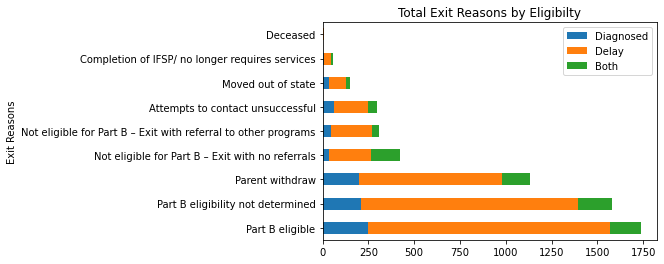

In [94]:
exit_reasons_stacked = pd.DataFrame([['Part B eligible', Part_b_both, Part_b_delay, Part_b_diagnosed], 
                ['Part B eligibility not determined', Part_b_elig_both, Part_b_elig_delay, Part_b_elig_diagnosed], 
                ['Parent withdraw',Part_parent_both, Part_parent_delay, Part_parent_diagnosed],
                ['Not eligible for Part B – Exit with no referrals',Part_not_both, Part_not_delay,Part_parent_diagnosed],
                ['Not eligible for Part B – Exit with referral to other programs',Part_referral_both, Part_referral_delay, Part_referral_diagnosed],
                ['Attempts to contact unsuccessful',Part_contact_both, Part_contact_delay, Part_contact_diagnosed],
                ['Moved out of state',Part_state_both, Part_state_delay, Part_state_diagnosed],
                ['Completion of IFSP/ no longer requires services', Part_IFSP_both , Part_IFSP_delay,Part_IFSP_diagnosed],
                ['Deceased',Part_deceased_both, Part_deceased_delay, Part_deceased_diagnosed]],
                                    columns=['Exit Reasons', 'Diagnosed', 'Delay', 'Both'])

exit_reasons_stacked.plot(x='Exit Reasons', kind='barh', stacked=True,
 title='Total Exit Reasons by Eligibilty')

In [76]:
exit_reason_list

['618 - Part B eligible',
 '618 - Part B eligibility not determined',
 '618 - Parent withdraw',
 '618 - Not eligible for Part B – Exit with no referrals',
 '618 - Not eligible for Part B – Exit with referral to other programs',
 '618 - Attempts to contact unsuccessful',
 '618 - Moved out of state',
 '618 - Completion of IFSP/ no longer requires services',
 '618 - Deceased']